In [12]:
# system library
import os
import sys
import json
import pickle

import datetime
import calendar
import operator
from tqdm.notebook import tqdm
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

# useful libraries
import math
import operator
import itertools
import statistics
import collections
from collections import Counter
from collections import OrderedDict

# pandas
import pandas as pd

# numpy
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# visualisarion
import pydotplus
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

# sklearn
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# dimensional reducers
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif  # classification
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression  # regression

# scalers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

# performance visualisation 
from sklearn import tree
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_decision_regions
from yellowbrick.model_selection import LearningCurve

# svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

from yellowbrick.style import set_palette
set_palette('bold')

In [20]:
X_train = pd.read_csv('Dataset/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True)
# add subject column to the dataframe



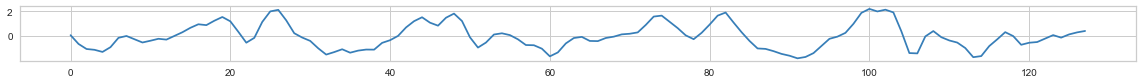

In [21]:
plt.figure(figsize=(20,1))
plt.plot(df.iloc[80,:].values)

# Preprocessing

In [22]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df)
norm_df = norm_df.squeeze()
df = pd.DataFrame(norm_df, index=df.index)

In [23]:
# apply moving average to dataset
w = 2
for i in range(norm_df.shape[0]):
    df.iloc[i,:] = (df.iloc[i,:] - df.iloc[i,:].mean()/df.iloc[i,:].std()).rolling(window=w).mean()

df.dropna(inplace=True, axis=1)

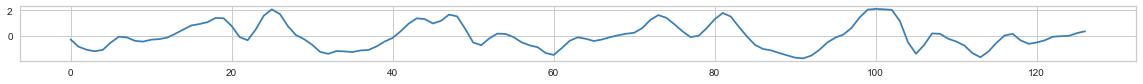

In [24]:
plt.figure(figsize=(20,1))
plt.plot(df.iloc[80,:].values)

In [25]:
df

,1,2,3,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
0,0.982995,2.529175,1.666779,1.927687,1.754143,0.725103,1.093774,0.847154,1.078076,1.435157,...,-0.018110,-0.787880,-1.017718,-0.687126,-0.836526,-0.871848,-0.783675,-1.017460,-1.004263,-0.541332
1,1.336843,1.787498,1.206290,1.313692,1.356213,0.930621,0.568533,0.162238,-0.177029,-0.302200,...,0.101723,-0.149601,0.213029,0.637644,0.573094,-0.001487,-1.224115,-2.211186,-2.002849,-1.233662
2,0.852741,0.173488,-0.861944,-1.942691,-1.841381,-0.562534,0.093608,0.339387,0.061898,-1.423187,...,-0.192718,0.284888,0.125288,-0.260987,-0.263034,-0.249634,-0.176858,0.091743,0.602849,0.763019
3,-0.698763,-0.295464,0.025595,-0.113161,-0.002994,0.270500,-0.503883,-2.369378,-3.738606,-2.917026,...,-0.286411,0.355236,0.523265,0.283670,-0.009469,-0.520002,-0.785098,-0.589496,-0.503680,-0.346995
4,0.051074,0.282941,1.125923,1.438909,0.882976,0.795884,1.139468,1.217521,1.193982,1.070523,...,0.879764,1.596924,0.908017,-0.649572,-0.525406,1.090373,1.431171,0.327202,-0.379690,-1.032362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,1.906969,2.642603,2.581118,1.517260,0.344853,-0.396715,-0.762738,-0.698543,-0.217125,0.301987,...,-0.789442,-0.924661,-0.924204,-0.855114,-0.762653,-0.631151,-0.540505,-0.563260,-0.649305,-0.758292
7348,2.857950,2.073477,0.590583,-0.473086,-0.802309,-0.518343,-0.215968,0.034831,0.334439,0.140052,...,-0.980295,-1.258804,-1.182939,-1.202783,-1.414602,-1.527876,-1.511034,-1.335882,-0.999743,-0.656603
7349,-0.791614,-0.642554,-0.552978,-0.390784,-0.115434,0.208474,0.597513,1.275248,2.173553,2.322232,...,-0.643977,-0.832771,-1.101695,-1.334861,-1.494523,-1.455745,-1.307893,-1.204909,-1.054571,-0.897901
7350,-0.294575,-0.301548,-0.219980,-0.141926,-0.030146,0.178905,0.641759,1.488263,2.138378,2.057599,...,-0.659336,-1.134738,-1.441743,-1.605002,-1.570040,-1.457306,-1.336367,-1.254530,-1.280344,-1.196392


In [26]:
df['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)

y_train = pd.read_csv('Dataset/train/y_train.txt', header = None, names = ['Activity'])
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

df['Activity'] = y_train
#df['ActivityName'] = y_train_labels


print('df: {}'.format(df.shape))

df: (7352, 129)


In [27]:
df

,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,subject,Activity
0,0.982995,2.529175,1.666779,1.927687,1.754143,0.725103,1.093774,0.847154,1.078076,1.435157,...,-1.017718,-0.687126,-0.836526,-0.871848,-0.783675,-1.017460,-1.004263,-0.541332,1,5
1,1.336843,1.787498,1.206290,1.313692,1.356213,0.930621,0.568533,0.162238,-0.177029,-0.302200,...,0.213029,0.637644,0.573094,-0.001487,-1.224115,-2.211186,-2.002849,-1.233662,1,5
2,0.852741,0.173488,-0.861944,-1.942691,-1.841381,-0.562534,0.093608,0.339387,0.061898,-1.423187,...,0.125288,-0.260987,-0.263034,-0.249634,-0.176858,0.091743,0.602849,0.763019,1,5
3,-0.698763,-0.295464,0.025595,-0.113161,-0.002994,0.270500,-0.503883,-2.369378,-3.738606,-2.917026,...,0.523265,0.283670,-0.009469,-0.520002,-0.785098,-0.589496,-0.503680,-0.346995,1,5
4,0.051074,0.282941,1.125923,1.438909,0.882976,0.795884,1.139468,1.217521,1.193982,1.070523,...,0.908017,-0.649572,-0.525406,1.090373,1.431171,0.327202,-0.379690,-1.032362,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,1.906969,2.642603,2.581118,1.517260,0.344853,-0.396715,-0.762738,-0.698543,-0.217125,0.301987,...,-0.924204,-0.855114,-0.762653,-0.631151,-0.540505,-0.563260,-0.649305,-0.758292,30,2
7348,2.857950,2.073477,0.590583,-0.473086,-0.802309,-0.518343,-0.215968,0.034831,0.334439,0.140052,...,-1.182939,-1.202783,-1.414602,-1.527876,-1.511034,-1.335882,-0.999743,-0.656603,30,2
7349,-0.791614,-0.642554,-0.552978,-0.390784,-0.115434,0.208474,0.597513,1.275248,2.173553,2.322232,...,-1.101695,-1.334861,-1.494523,-1.455745,-1.307893,-1.204909,-1.054571,-0.897901,30,2
7350,-0.294575,-0.301548,-0.219980,-0.141926,-0.030146,0.178905,0.641759,1.488263,2.138378,2.057599,...,-1.441743,-1.605002,-1.570040,-1.457306,-1.336367,-1.254530,-1.280344,-1.196392,30,2


# Filtrare il dataset per soggetto

In [28]:
df[df['Activity']==1]['subject'].value_counts()[:10]

1     95
25    74
30    65
17    61
11    59
14    59
26    59
23    59
3     58
7     57
Name: subject, dtype: int64

# Matrix Profile: subject 1 e 25 - 5 activities

Verificare la presenza di patterns all'interno di time series di 5 attività di un soggetto

In [29]:
#sub 1-25
df_sub1 = df[df['subject']==1].iloc[:,:-2]
sub1_activity = df[df['subject']==1]['Activity'].unique()
id_sub1 = df_sub1.index

sub25_activity = df[df['subject']==25]['Activity'].unique()
df_sub25 = df[df['subject']==25].iloc[:,:-2]
id_sub25 = df_sub25.index

In [30]:
df_sub1 = df_sub1.values
df_sub25 = df_sub25.values
print("number of experiments of subject 1:", df_sub1.shape[0])

number of experiments of subject 1: 347


In [31]:
from matrixprofile import *

## Motifs Discovery: sub1

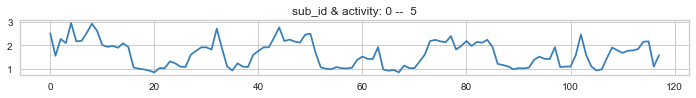

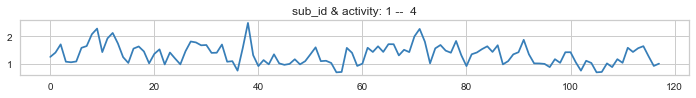

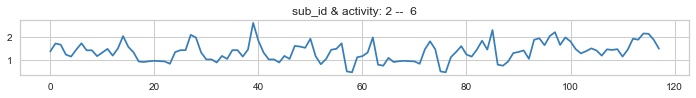

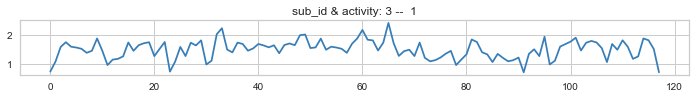

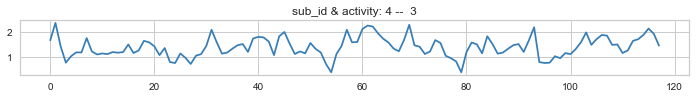

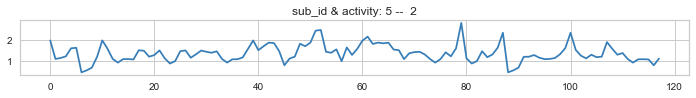

In [45]:
mp_sub1 = []
mpi_sub1 = []

for sub, sub_id, act in zip(df_sub1, id_sub1, sub1_activity):
    plt.figure(figsize=(12,1))
    w = 10
    mp, mpi = matrixProfile.stomp(sub, w)
    mp_sub1.append(mp)
    mpi_sub1.append(mpi)
    plt.title("sub_id & activity: {} --  {}".format(sub_id, act))
    plt.plot(mp)
    plt.show()

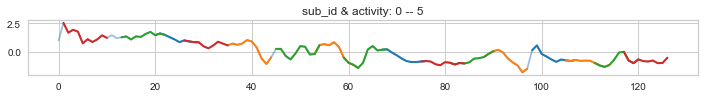

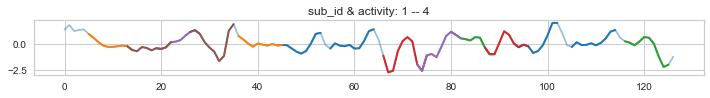

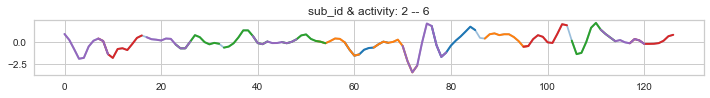

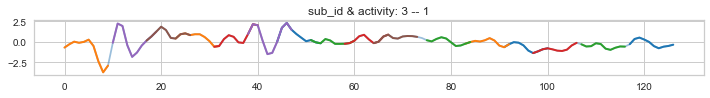

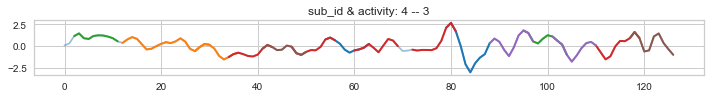

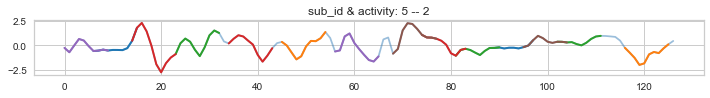

In [46]:
for sub, mp, mpi, sub_id, act in zip(df_sub1, mp_sub1, mpi_sub1, id_sub1, sub1_activity):
    mo, mod  = motifs.motifs(sub, (mp, mpi), max_motifs=10)
    plt.figure(figsize=(12,1))
    plt.plot(sub,alpha=0.5)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = sub[i:i+w]
            plt.title("sub_id & activity: {} -- {}".format(sub_id, act))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=1)

    plt.show()

### Best motifs

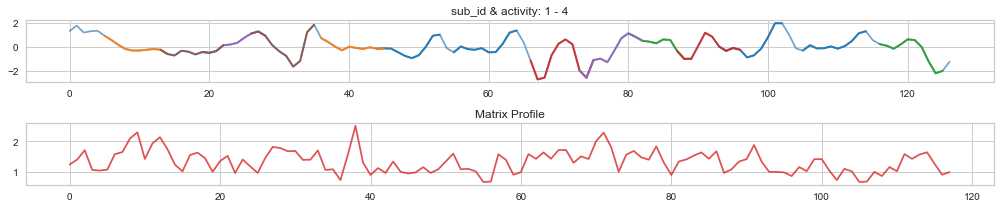

In [47]:
# Broken Homes

fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 10
mp, mpi = matrixProfile.stomp(df_sub1[1,:], w)
mo, mod  = motifs.motifs(df_sub1[1,:], (mp, mpi), max_motifs=10)

ax[0].plot(df_sub1[1,:],alpha=0.7)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub1[1,:][i:i+w]
        ax[0].set_title("sub_id & activity: {} - {}".format(id_sub1[1], sub1_activity[1]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_sub1[1], color=color, alpha=0.8)

fig.tight_layout()

In [38]:

print('MOTIFS INDEX:', mo)

MOTIFS INDEX: [[44, 55, 93, 105], [5, 36], [80, 116], [66, 87], [19, 73], [13, 26]]


In [39]:
print('MOTIFS DISTANCE:', mod)

MOTIFS DISTANCE: [0.6758289295772093, 0.7383131829133295, 0.9058456585669852, 0.9700346791583941, 1.0080710071444952, 1.741607514095454]


 MOTIFS - subject 1 - acitivty 4 


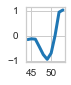

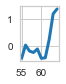

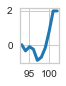

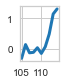

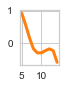

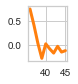

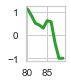

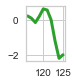

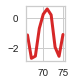

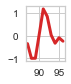

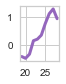

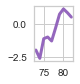

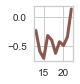

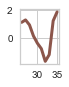

In [48]:
print(' MOTIFS - subject 1 - acitivty 4 ')
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub1[1,:][i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

### Lowering w

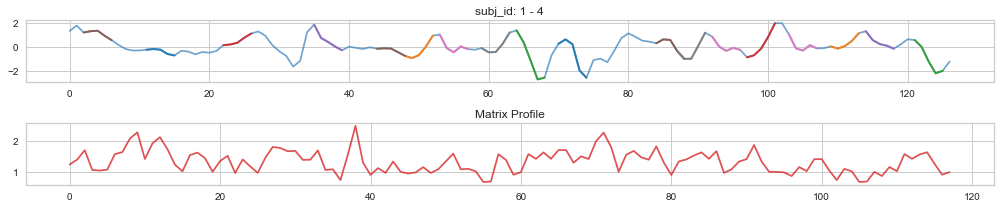

In [41]:
# Stesso motif ma con una finestra più piccola di 5

fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 5
mp, mpi = matrixProfile.stomp(df_sub1[1,:], w)
mo, mod  = motifs.motifs(df_sub1[1,:], (mp, mpi), max_motifs=10)

ax[0].plot(df_sub1[1,:],alpha=0.7)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub1[1,:][i:i+w]
        ax[0].set_title("subj_id: {} - {}".format(id_sub1[1], sub1_activity[1]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_sub1[1], color=color, alpha=0.8)

fig.tight_layout()

In [42]:
print('MOTIFS INDEX:', mo)

MOTIFS INDEX: [[11, 70], [48, 109], [64, 121], [22, 97], [35, 114], [2, 44, 84], [53, 92, 103], [59, 87]]


In [43]:
print('MOTIFS DISTANCE:', mod)

MOTIFS DISTANCE: [0.07786780504106089, 0.12799752235905648, 0.1501950991966754, 0.1585720442131604, 0.18936270343175476, 0.21681419561727341, 0.2388990355426747, 0.24552616558346954]


 MOTIFS - subject: 1 - soggetto1 


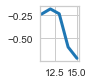

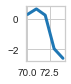

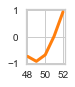

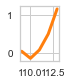

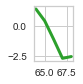

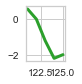

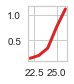

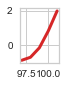

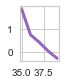

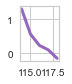

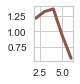

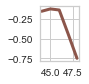

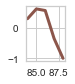

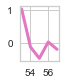

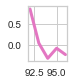

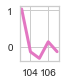

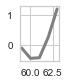

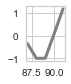

In [44]:
print(' MOTIFS - subject: 1 - soggetto1 ')
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub1[1,:][i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

Riducendo la dimensione della finestra si ottengono patterns ancora più simili: si può notare una ripetizione dell'accelerazione corporea durante tutta l'esecuzione dell'attività 4 (sitting)

## Motifs Discovery: sub25

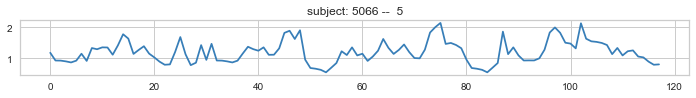

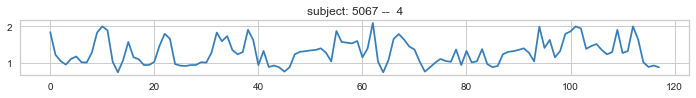

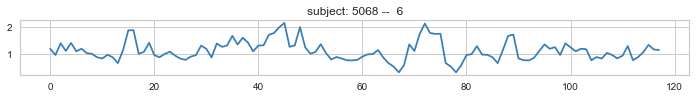

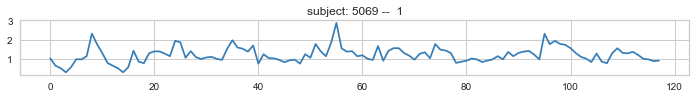

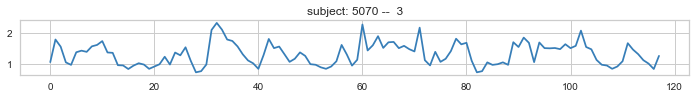

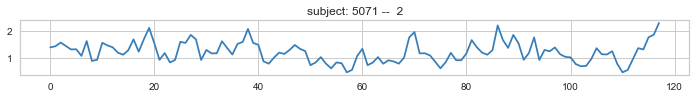

In [49]:
mp_sub25 = []
mpi_sub25 = []

for sub, sub_id, act in zip(df_sub25, id_sub25, sub25_activity):
    plt.figure(figsize=(12,1))
    w = 10
    mp, mpi = matrixProfile.stomp(sub, w)
    mp_sub25.append(mp)
    mpi_sub25.append(mpi)
    plt.title("subject: {} --  {}".format(sub_id, act))
    plt.plot(mp)
    plt.show()

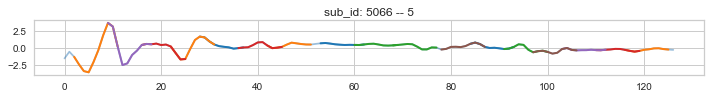

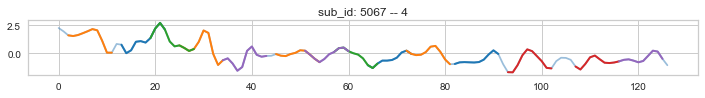

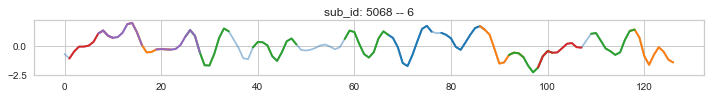

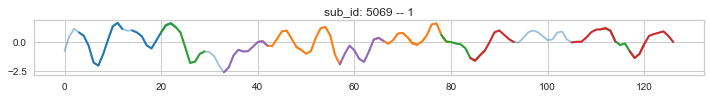

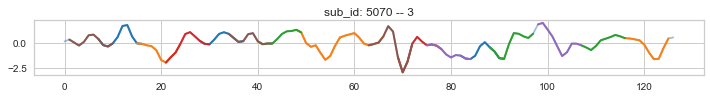

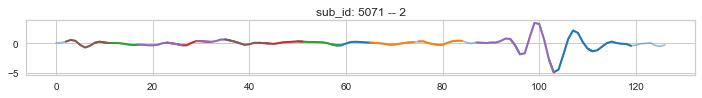

In [50]:
for sub, mp, mpi, sub_id, act in zip(df_sub25, mp_sub25, mpi_sub25, id_sub25, sub25_activity):
    mo, mod  = motifs.motifs(sub, (mp, mpi), max_motifs=10)
    plt.figure(figsize=(12,1))
    plt.plot(sub,alpha=0.5)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = sub[i:i+w]
            plt.title("sub_id: {} -- {}".format(sub_id, act))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=1)

    plt.show()

### Best motifs

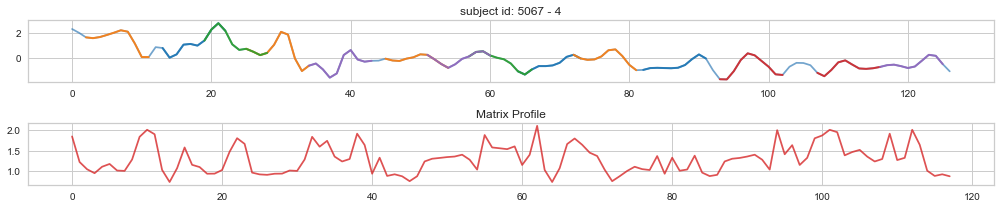

In [51]:

fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 10
mp, mpi = matrixProfile.stomp(df_sub25[1,:], w)
mo, mod  = motifs.motifs(df_sub25[1,:], (mp, mpi), max_motifs=10)

ax[0].plot(df_sub25[1,:],alpha=0.7)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub25[1,:][i:i+w]
        ax[0].set_title("subject id: {} - {}".format(id_sub25[1], sub25_activity[1]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_sub25[1], color=color, alpha=0.8)

fig.tight_layout()

In [52]:

print('MOTIFS INDEX:', mo)

MOTIFS INDEX: [[13, 64, 82], [2, 25, 45, 72], [19, 57], [93, 107], [34, 51, 116]]


In [53]:

print('MOTIFS DISTANCE:', mod)

MOTIFS DISTANCE: [0.7360190783182868, 0.7560297800745727, 0.9390010566510926, 1.036894795051647, 1.3535890683407483]


 MOTIFS - subject: 5067 - soggetto25 


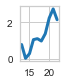

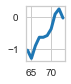

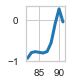

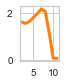

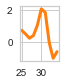

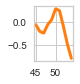

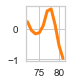

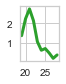

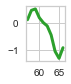

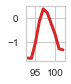

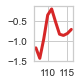

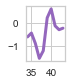

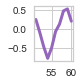

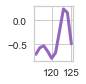

In [54]:
print(' MOTIFS - subject: 5067 - soggetto25 ')
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub25[1,:][i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

### Lowering w

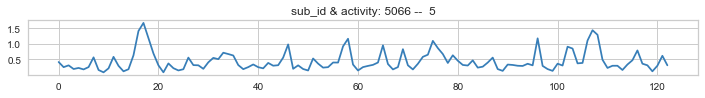

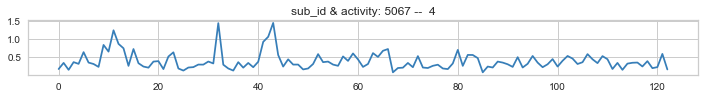

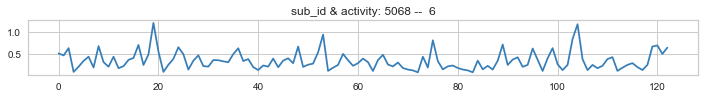

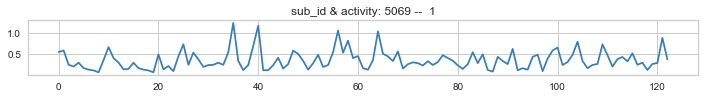

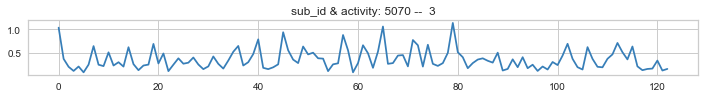

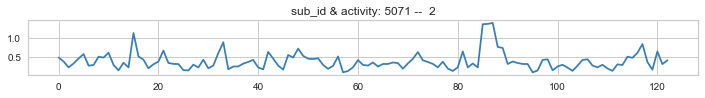

In [59]:
mp_sub25 = []
mpi_sub25 = []

for sub, sub_id, act in zip(df_sub25, id_sub25, sub25_activity):
    plt.figure(figsize=(12,1))
    w = 5
    mp, mpi = matrixProfile.stomp(sub, w)
    mp_sub25.append(mp)
    mpi_sub25.append(mpi)
    plt.title("sub_id & activity: {} --  {}".format(sub_id, act))
    plt.plot(mp)
    plt.show()

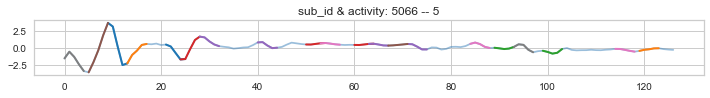

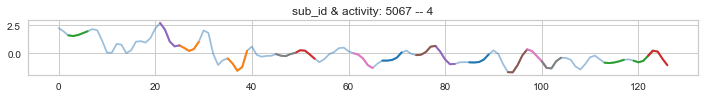

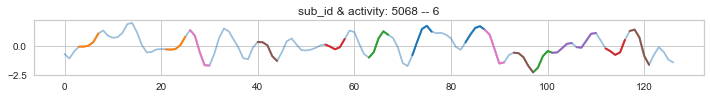

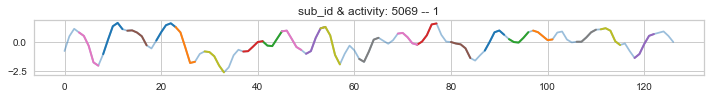

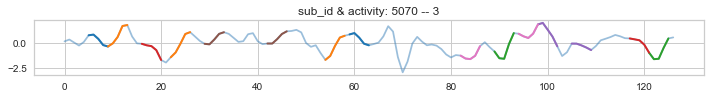

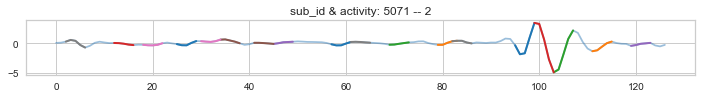

In [60]:
for sub, mp, mpi, sub_id, act in zip(df_sub25, mp_sub25, mpi_sub25, id_sub25, sub25_activity):
    mo, mod  = motifs.motifs(sub, (mp, mpi), max_motifs=10)
    plt.figure(figsize=(12,1))
    plt.plot(sub,alpha=0.5)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = sub[i:i+w]
            plt.title("sub_id & activity: {} -- {}".format(sub_id, act))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=1)

    plt.show()

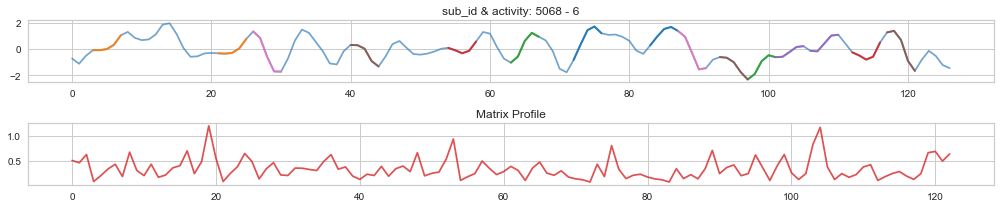

In [61]:

fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 5
mp, mpi = matrixProfile.stomp(df_sub25[2,:], w)
mo, mod  = motifs.motifs(df_sub25[2,:], (mp, mpi), max_motifs=10)

ax[0].plot(df_sub25[2,:],alpha=0.7)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub25[2,:][i:i+w]
        ax[0].set_title("sub_id & activity: {} - {}".format(id_sub25[2], sub25_activity[2]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_sub25[2], color=color, alpha=0.8)

fig.tight_layout()

 MOTIFS - subject: 5067 - soggetto25 


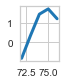

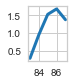

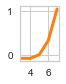

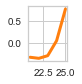

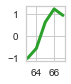

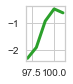

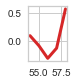

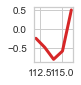

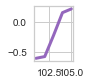

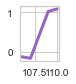

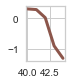

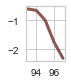

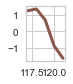

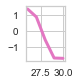

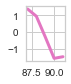

In [62]:
print(' MOTIFS - subject: 5067 - soggetto25 ')
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_sub25[2,:][i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

Anche in quest caso riducendo la finestra si ottengono dei patterns ancora più simili fra loro. In generale tuttavia si possono vedere pattern ricorrenti in tutte e 6 le attività

In [64]:

from matrixprofile.discords import discords

## Anomaly Discovery Subject 1

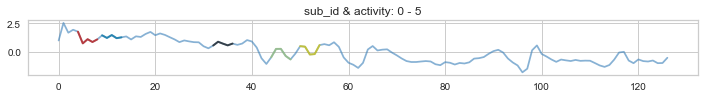

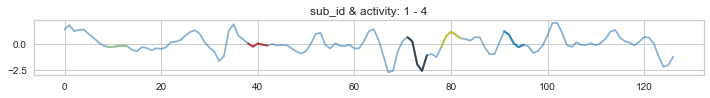

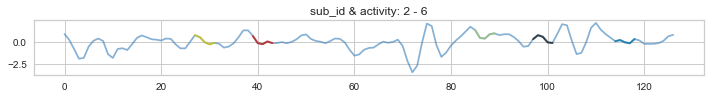

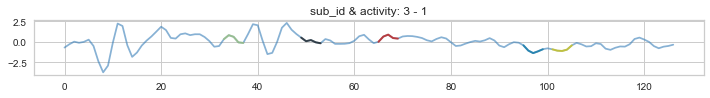

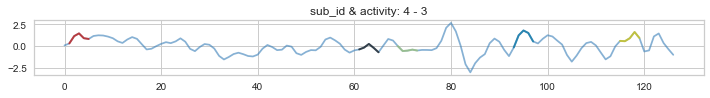

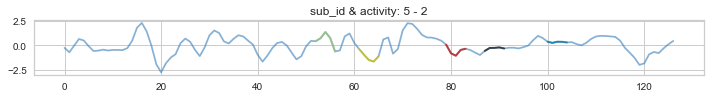

In [66]:
for sub, mp, sub_id, act in zip(df_sub1, mp_sub1, id_sub1, sub1_activity):
    anoms = discords(mp, ex_zone=5, k=5)
    plt.figure(figsize=(12,1))
    plt.title("sub_id & activity: {} - {}".format(sub_id, act))
    plt.plot(sub, alpha=0.6)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
    for a, c in zip(anoms, colors):
        a_shape = sub[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=2, alpha=0.7)

    plt.show()

## Anomaly Discovery Subject 25

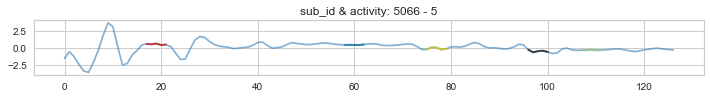

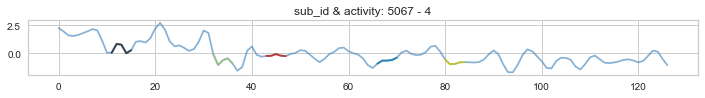

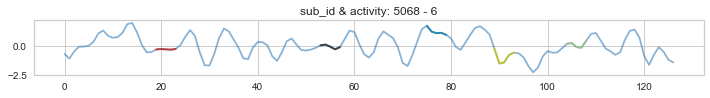

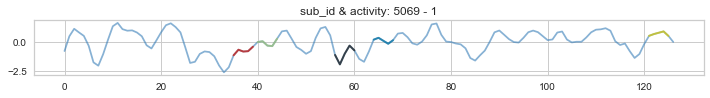

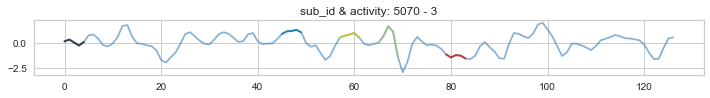

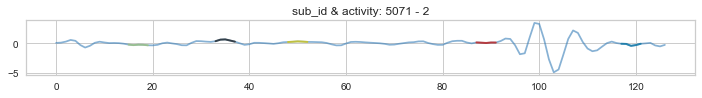

In [67]:
for sub, mp, sub_id, act in zip(df_sub25, mp_sub25, id_sub25, sub25_activity):
    anoms = discords(mp, ex_zone=5, k=5)
    plt.figure(figsize=(12,1))
    plt.title("sub_id & activity: {} - {}".format(sub_id, act))
    plt.plot(sub, alpha=0.6)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
    for a, c in zip(anoms, colors):
        a_shape = sub[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=2, alpha=0.7)

    plt.show()

Presenza molto ridotta di anomalie all'interno delle TS